# ANALISIS DEL *DATASET* FINAL

In [1]:
# some imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings('ignore')

**Importamos la librería de funciones desarrolladas para este proyecto**

In [2]:
import nbimporter
import importlib

In [3]:
import Functions_for_FMP as fffmp

In [4]:
importlib.reload(fffmp)
import Functions_for_FMP as fffmp

## Carga de los datos

In [5]:
data_final='FMP_final'
FMP = pd.read_pickle(data_final)

In [6]:
display(FMP)

,id,target,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,home_rating_diff_1,home_rating_diff_2,home_rating_diff_3,home_rating_diff_4,home_rating_diff_5,home_rating_diff_6,home_rating_diff_7,home_rating_diff_8,home_rating_diff_9,home_rating_diff_10,away_rating_diff_1,away_rating_diff_2,away_rating_diff_3,away_rating_diff_4,away_rating_diff_5,away_rating_diff_6,away_rating_diff_7,away_rating_diff_8,away_rating_diff_9,away_rating_diff_10,Rating_diff,home_goal_diff_1,home_goal_diff_2,home_goal_diff_3,home_goal_diff_4,home_goal_diff_5,home_goal_diff_6,home_goal_diff_7,home_goal_diff_8,home_goal_diff_9,home_goal_diff_10,away_goal_diff_1,away_goal_diff_2,away_goal_diff_3,away_goal_diff_4,away_goal_diff_5,away_goal_diff_6,away_goal_diff_7,away_goal_diff_8,away_goal_diff_9,away_goal_diff_10,home_coach_continuity_1,home_coach_continuity_2,home_coach_continuity_3,home_coach_continuity_4,home_coach_continuity_5,home_coach_continuity_6,home_coach_continuity_7,home_coach_continuity_8,home_coach_continuity_9,home_coach_continuity,home_coach_continuity_10,away_coach_continuity_1,away_coach_continuity_2,away_coach_continuity_3,away_coach_continuity_4,away_coach_continuity_5,away_coach_continuity_6,away_coach_continuity_7,away_coach_continuity_8,away_coach_continuity_9,away_coach_continuity,away_coach_continuity_10,Descanso_entre_partidos_relativo,home_relevance_1,home_relevance_2,home_relevance_3,home_relevance_4,home_relevance_5,home_relevance_6,home_relevance_7,home_relevance_8,home_relevance_9,home_relevance_10,away_relevance_1,away_relevance_2,away_relevance_3,away_relevance_4,away_relevance_5,away_relevance_6,away_relevance_7,away_relevance_8,away_relevance_9,away_relevance_10,home_outcome_V_1,home_outcome_D_1,home_outcome_V_2,home_outcome_D_2,home_outcome_V_3,home_outcome_D_3,home_outcome_V_4,home_outcome_D_4,home_outcome_V_5,home_outcome_D_5,home_outcome_V_6,home_outcome_D_6,home_outcome_V_7,home_outcome_D_7,home_outcome_V_8,home_outcome_D_8,home_outcome_V_9,home_outcome_D_9,home_outcome_V_10,home_outcome_D_10,away_outcome_V_1,away_outcome_D_1,away_outcome_V_2,away_outcome_D_2,away_outcome_V_3,away_outcome_D_3,away_outcome_V_4,away_outcome_D_4,away_outcome_V_5,away_outcome_D_5,away_outcome_V_6,away_outcome_D_6,away_outcome_V_7,away_outcome_D_7,away_outcome_V_8,away_outcome_D_8,away_outcome_V_9,away_outcome_D_9,away_outcome_V_10,away_outcome_D_10,home_is_friendly_1,home_is_friendly_2,home_is_friendly_3,home_is_friendly_4,home_is_friendly_5,home_is_friendly_6,home_is_friendly_7,home_is_friendly_8,home_is_friendly_9,home_is_friendly_10,away_is_friendly_1,away_is_friendly_2,away_is_friendly_3,away_is_friendly_4,away_is_friendly_5,away_is_friendly_6,away_is_friendly_7,away_is_friendly_8,away_is_friendly_9,away_is_friendly_10,is_friendly,home_corrected_rating_diff_1,home_corrected_rating_diff_2,home_

In [7]:
fffmp.check_NaNs(FMP)

No hay missing values en el dataset :)


In [8]:
fffmp.Print_features(FMP)

Today Features

id
target
is_cup
Rating_diff
home_coach_continuity
away_coach_continuity
Descanso_entre_partidos_relativo
is_friendly


Historic Features

home/away_team_history_is_play_home_i
home/away_team_history_is_cup_i
home/away_rating_diff_i
home/away_goal_diff_i
home/away_coach_continuity_i
home/away_relevance_i
home/away_outcome_V_i
home/away_outcome_D_i
home/away_is_friendly_i
home/away_corrected_rating_diff_i


# Análisis

La idea ahora será analizar y ganar un poco de intuición acerca de algunas de estas nuevas variables o *features* generadas

In [9]:
import seaborn as sns
sns.set_theme()

**1) DISTRIBUCIÓN DE LA VARIABLE DIFERENCIA DE GOL**

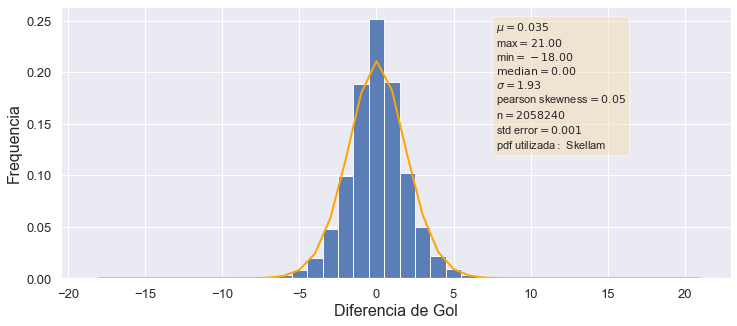

In [10]:
Features=['goal_diff']
Type=['historic']
n_bin=39
Dist='Skellam'
y_label='Frequencia'
x_label='Diferencia de Gol'
alignment='left'
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment)

Tanto la simetría de la distribución (cuantificada de cierta forma por el *skewness*) como el hecho de que la media sea cercana a cero (incluso cuando considerando el error estandar no lo incluya), son buenos señales. Nos dan una idea de que el *dataset* esta balanceado, habiendo tanto equipos de menor rendimiento (diferencia negativa) como de mayor (diferencia positiva).

Yendo un poco más en profundidad, dado que la variable "diferencia de gol" es el resultado de la resta de variables de Poisson, la distribución de ella debe ser de Skellam. Podemos ver que utilizando los valores de $\sigma$ y $\mu$ calculados, la distribución representa bastante bien los datos.

Debe tenerse en cuenta que al haber partidos de local y visitante, la variable "diferencia de goal" la esperamos centrada en cero.

**Si analizamos el efecto de la localía:**

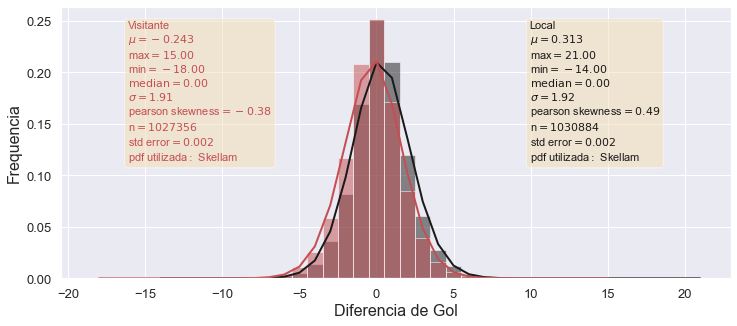

In [11]:
Feature='goal_diff'
Condition='team_history_is_play_home'
n_bin_local=35
n_bin_visitante=33
n_bin=[n_bin_local,n_bin_visitante]
Dist='Skellam'
y_label='Frequencia'
x_label='Diferencia de Gol'
alignment='left'
Cond_Labels=['Local','Visitante']
Text_box_pos=[0.7,0.1]
fffmp.Plot_distribution_por_Condicion(FMP,Feature,Condition,Cond_Labels,n_bin,Dist,x_label,y_label,alignment,Text_box_pos)

Efectivamente recuperamos una diferencia. Como era de esperarse, hay una cierta ventaja de localía que se ve reflejda en una diferencia de gol positiva.

Es interesante sin embargo, lo que pasa al tratar ir hacia atrás desde este resultado y calculando en vase a $\mu$ u $\sigma$ los valores esperados de goles de local y visitante.

1) Para la curva "local":
    
$\mu_{gol\,local}=\frac{\sigma^2+\mu}{2}=2.000$
    
$\mu_{gol\,visitante}=\frac{\sigma^2-\mu}{2}=1.687$

2) Para la curva "visitante":
    
$\mu_{gol\,visitante}=\frac{\sigma^2+\mu}{2}=1.703$
    
$\mu_{gol\,local}=\frac{\sigma^2-\mu}{2}=1.946$

Si bien se mantiene una diferencia de aproximadamente $0.3$, los valores son sensiblemente más grandes. 

De hecho, si hacemos lo mismo para la distribución que no distingue locales de visitates, los valores medios hayados tambien son mas grandes de los esperados (aunque ahora alrrededor del mismo valor):

$\mu_{gol\,equipo}=\frac{\sigma^2+\mu}{2}=1.878$
    
$\mu_{gol\,oponente}=\frac{\sigma^2-\mu}{2}=1.845$


En principio dudé del proceso realizado para completar los valores faltantes, sin embargo, si volvemos a ese *dataset* y graficamos las distribuciones, recuperamos las distribuciones originales sin sensibles alteraciones: 

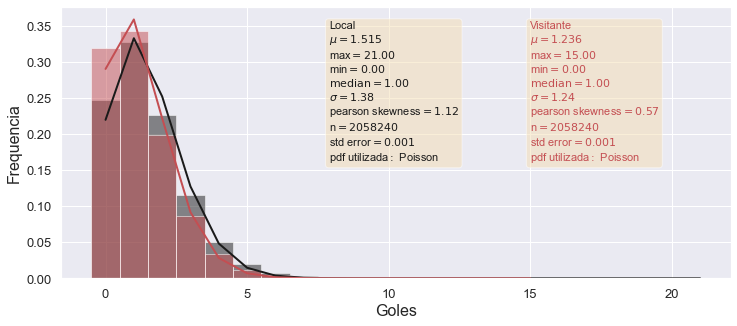

In [12]:
data_clean='FMP_clean'
fmp_aux = pd.read_pickle(data_clean)

Features_Team='team_history_goal'
Features_Opponent='team_history_opponent_goal'
Condition='team_history_is_play_home'
n_bin_local=21
n_bin_visitante=15
n_bin=[n_bin_local,n_bin_visitante]
Dist='Poisson'
y_label='Frequencia'
x_label='Goles'
alignment='left'
Cond_Labels=['Local','Visitante']
fffmp.Plot_distribution_por_Condicion_team_and_opp(fmp_aux,Features_Team,Features_Opponent,Condition,Cond_Labels,n_bin,Dist,x_label,y_label,alignment)
del(fmp_aux)

Tampoco parece haber errores en la forma de tratar las variables (3_Tratamiento_de_Variables). Para calcular esta diferencia de gol el codigo es bastante directo, por lo que no hay mucho espacio para errores.

De esta forma, lo que creo que pasa es que ambas variables no son independientes. De cierta forma tiene sentido, estamos haciendo una resta entre eventos relacionados, que suceden en un mismo partidos. La performance de un equipo afecta a la otra!

Al menos eso pensaba hasta ver que la correlación no parece muy alta entre los goles de un equipo y otro. Por lo que aún esto es algo que no termino de entender bien.

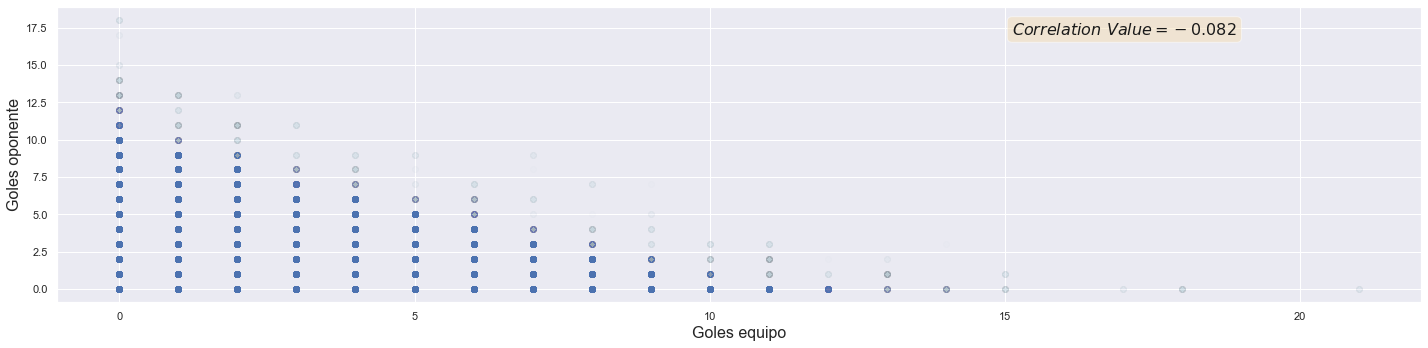

In [13]:
data_clean='FMP_clean'
fmp_aux = pd.read_pickle(data_clean)
X_feature=['team_history_goal']
Y_feature=['team_history_opponent_goal']
Plot_labels=['Goles equipo','Goles oponente']
alpha=0.006
fffmp.Correlacion_X_vs_Y_his(fmp_aux,X_feature,Y_feature,Plot_labels,alpha)
del(fmp_aux)#borramos de la memora el dataset para no llenar la memoria.

Hay una **correlacion negativa** aunque muy pequeña. Igualmente sigo pensando que debería haber algo ahí (incluso el gráfico parece sugerirlo). No se si la mayor variabilidad cerca de $(0,0)$ esta (en el cálculo) ocultando esa información.

**Por otro lado, podemos ver el efecto de jugar copa o liga**

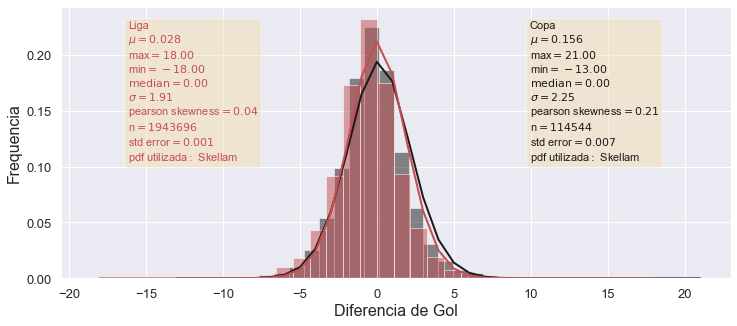

In [14]:
Feature='goal_diff'
Condition='team_history_is_cup'
n_bin_local=35
n_bin_visitante=33
n_bin=[n_bin_local,n_bin_visitante]
Dist='Skellam'
y_label='Frequencia'
x_label='Diferencia de Gol'
alignment='left'
Cond_Labels=['Copa','Liga']
Text_box_pos=[0.7,0.1]
fffmp.Plot_distribution_por_Condicion(FMP,Feature,Condition,Cond_Labels,n_bin,Dist,x_label,y_label,alignment,Text_box_pos)

Este resultado debe ser tomado con mayor precución ya que hay un order de magnitud entre el numero de muestras en uno y otro grupo. Sin embargo, la $\sigma$ mayor observada para los partidos de copa, sugeriría (considerando el error estandar) una tendencia a partidos con mayor diferencia de gol. Creo que al ser partidos de eliminción, esto puede tener sentido.

**2) CORRELACION DIFERENCIA DE GOL CON DIF DE RATING**

En el dataset original ya havíamos explorado la relacion entre los goles anotados y el *rating* de un equipo. Ahora queremos ver quan relacionada está la diferencia en el marcador con la diferencia del *rating*.

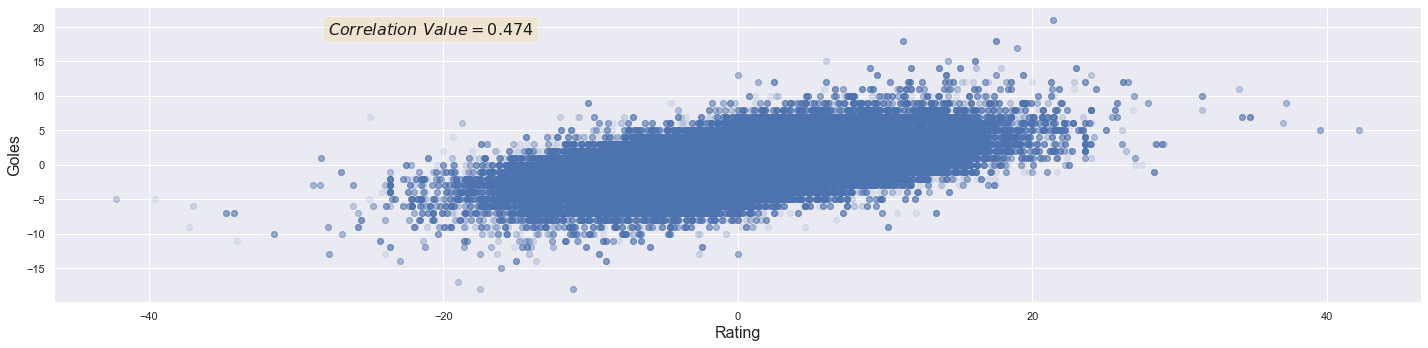

In [15]:
Y_feature=['goal_diff']
X_feature=['rating_diff']
Plot_labels=['Rating','Goles']
alpha=0.1
text_x_pos=0.2
fffmp.Correlacion_X_vs_Y_his(FMP,X_feature,Y_feature,Plot_labels,alpha,text_x_pos)

Tal como era de esperarse hay una correlación positiva importante entre estas dos variables. Incluso mayor que para la encontrada entre goles anotados y *rating* ($0.391$).

El *rating* corregido, por su parte, esta forzadamente correlacionado con la diferencia de gol por definicion.

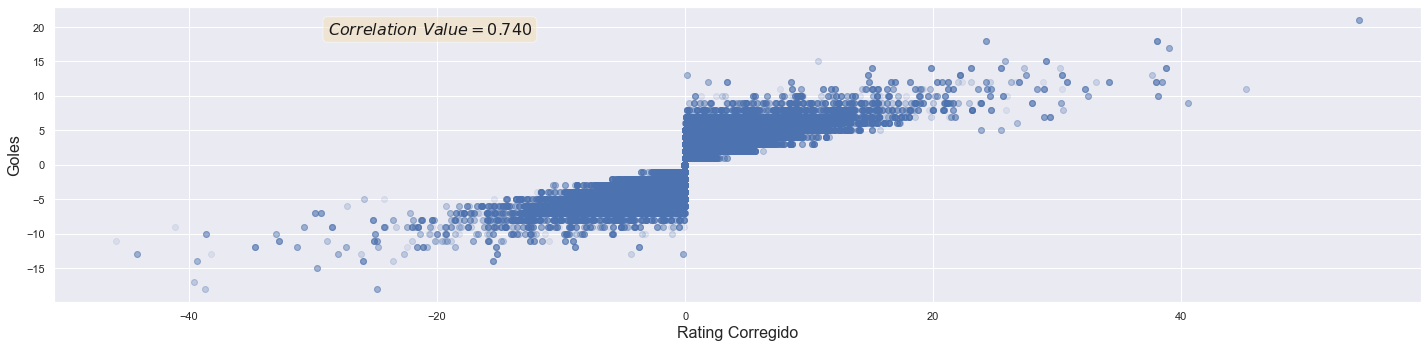

In [16]:
Y_feature=['goal_diff']
X_feature=['corrected_rating_diff']
Plot_labels=['Rating Corregido','Goles']
alpha=0.1
text_x_pos=0.2
fffmp.Correlacion_X_vs_Y_his(FMP,X_feature,Y_feature,Plot_labels,alpha,text_x_pos)

Tengo que admitir que igualmente no me esperaba esa forma en la nube de puntos.

**3) DISTRIBUCIÓN DE LA VARIABLE DIFERENCIA DE *RATING***

Solo por curiosidad, veamos que tal luce la distribución de esta nueva variable. Recordemos que la hemos normalizado internamente para cada liga.

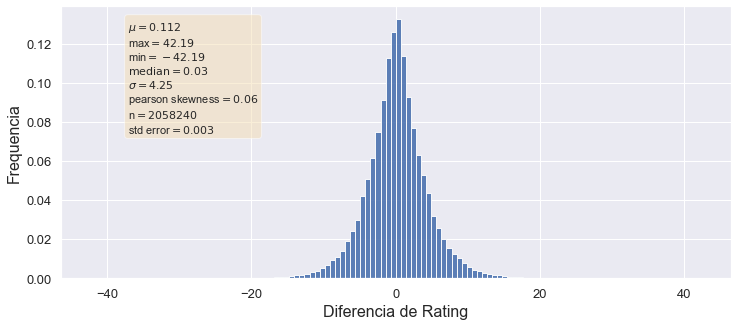

In [17]:
Features=['rating_diff']
Type=['historic']
n_bin=120
Dist='Unknown'
y_label='Frequencia'
x_label='Diferencia de Rating'
alignment='mid'
text_x_pos=0.1
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos)

La naturaleza de distribución esta vez no la vamos investigar. Al menos podemos ver que esta centrada en cero, o que da signos de un *dataset* balanceado.

Y qué pasa con el rating corregido?

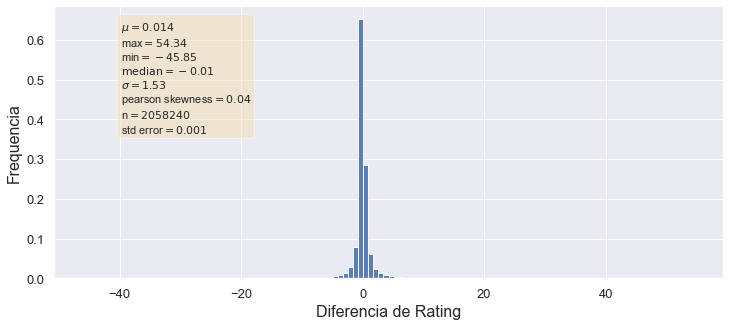

In [18]:
Features=['corrected_rating_diff']
Type=['historic']
n_bin=120
Dist='Unknown'
y_label='Frequencia'
x_label='Diferencia de Rating'
alignment='mid'
text_x_pos=0.1
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos)

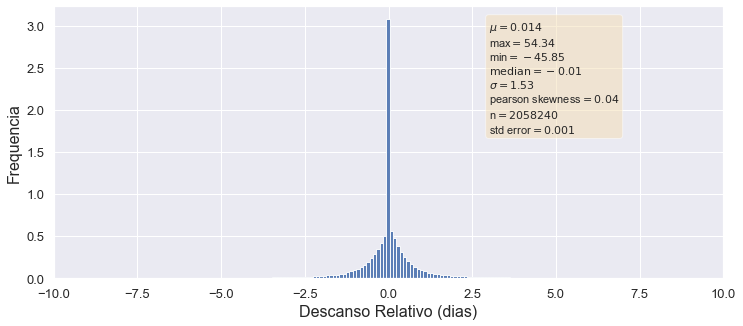

In [19]:
Features=['corrected_rating_diff']
Type=['historic']
n_bin=1000
Dist='Unknown'
y_label='Frequencia'
x_label='Descanso Relativo (dias)'
alignment='mid'
text_x_pos=0.65
x_lim=(-10,10)
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos,x_lim)

Bueno, esto era más por curiosidad. No tengo muchos comentarios para hacer aqui.

**4) DISTRIBUCIÓN DEL DESCANSO RELATIVO**

Otro aspecto que agregamos fue el *featurte* de descanso relativo. Este trata de capturar el desgaste acumuldo relativo entre dos equipos. Si es positivo (negativo), el equipo local (visitante) tiene ventaja. Veamos que tal luce:

In [20]:
importlib.reload(fffmp)
import Functions_for_FMP as fffmp

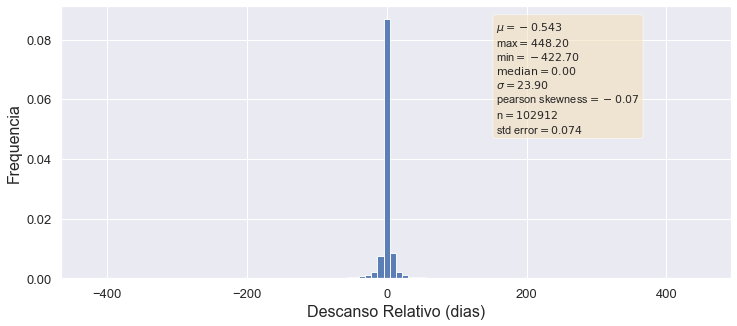

In [21]:
Features=['Descanso_entre_partidos_relativo']
Type=['match']
n_bin=100
Dist='Unknown'
y_label='Frequencia'
x_label='Descanso Relativo (dias)'
alignment='mid'
text_x_pos=0.65
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos)

Si nos quedamos con la parte central y ajustamos el tamaño de *bin*:

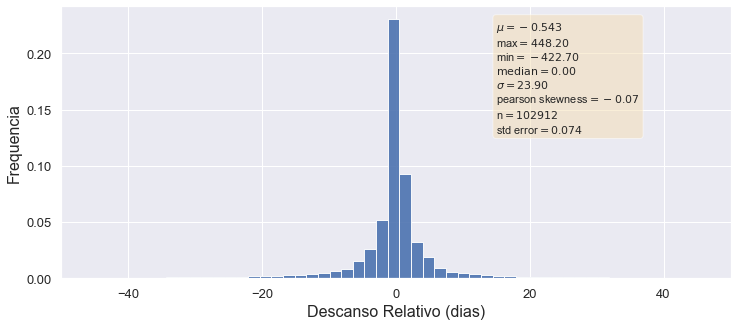

In [22]:
Features=['Descanso_entre_partidos_relativo']
Type=['match']
n_bin=500
Dist='Unknown'
y_label='Frequencia'
x_label='Descanso Relativo (dias)'
alignment='mid'
text_x_pos=0.65
x_lim=(-50,50)
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos,x_lim)

Aquí no tengo muchos comentarios para hacer, más alla de que al menos se ve balanceado: locales y visitantes tienen estadísticamente el mismo descanso

**5) EFECTO DEL CAMBIO DE ENTRENADOR**

Es bastante comun que se asocie un cambio en el rendimiento de un equipo con el cambio de entrenador. A continuación analizamos ello, mirando a los porcentajes de victoria, empate y derrota, antes y despues de dicho evento.

,Condición,Muestras,% Victorias,% Empates:,% Derrotas
0,General,2058240,0.368761,0.251043,0.380196
1,5 partidos antes de un cambio de entrenador,22516,0.376621,0.251288,0.372091
2,4 partidos antes de un cambio de entrenador,28387,0.373446,0.273682,0.352873
3,3 partidos antes de un cambio de entrenador,34295,0.380172,0.260300,0.359528
4,2 partidos antes de un cambio de entrenador,40212,0.383194,0.262807,0.353999
5,1 partidos antes de un cambio de entrenador,46115,0.385146,0.262800,0.352055
6,En el partido de un cambio de entrenador,51953,0.392701,0.255288,0.352010
7,1 partidos después de un cambio de entrenador,51953,0.446904,0.241430,0.311666
8,2 partidos después de un cambio de entrenador,46563,0.451303,0.243971,0.304727
9,3 partidos después de un cambio de entrenador,40956,0.440399,0.242236,0.317365


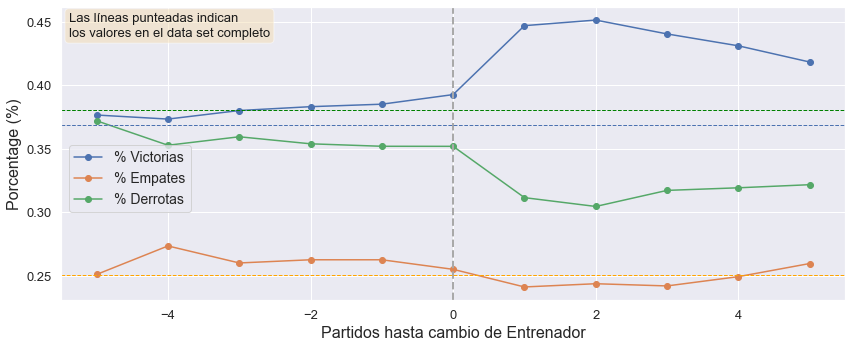

In [23]:
fffmp.Trainer_effect_on_the_outcome(FMP,5)

De forma bastante interesante, sí se pueden ver una mejora en el rendimiento alrrededor de dicho evento. Aunque dicho efecto o *boost* parece ir decreciendo a medida pasan los partidos.

**6) CORRELACIONES CON EL OUTPUT**

Finalmente, demosle una mirada a como influyen las distintas variables con el resultado de un partido a traves de matrices de correlacion. Vale aclarar que los valores de correlación no determinan la explicabilidad de las variables, sino que sirven de referencia.

Para ello comenzamos por revisar cuales son las variables o *features* del *dataset*

In [24]:
fffmp.Print_features(FMP)

Today Features

id
target
is_cup
Rating_diff
home_coach_continuity
away_coach_continuity
Descanso_entre_partidos_relativo
is_friendly


Historic Features

home/away_team_history_is_play_home_i
home/away_team_history_is_cup_i
home/away_rating_diff_i
home/away_goal_diff_i
home/away_coach_continuity_i
home/away_relevance_i
home/away_outcome_V_i
home/away_outcome_D_i
home/away_is_friendly_i
home/away_corrected_rating_diff_i


Las *Today Features* (*Match_day_Features* en adelante) las representaremos todas juntas, mientras que para las *Historic Features* haremos graficos individuales para que sea más accesible la visualización.

Es importante también mencionar que se representará la matriz de correlación $M$ como $sign(M)\,\sqrt{abs(M)}$, para facilitar el análisis. Cómo referencia, adjuntamos un tabla de valores de referencia:

In [25]:
real=np.array([0.0001,0.001,0.01,0.02,0.03,0.05,0.1,0.25,0.3,0.5,0.8,1])
scale=np.sqrt(real)
display(pd.DataFrame({'Original':real,'Transformado':scale}))

,Original,Transformado
0,0.0001,0.010000
1,0.0010,0.031623
2,0.0100,0.100000
3,0.0200,0.141421
4,0.0300,0.173205
5,0.0500,0.223607
6,0.1000,0.316228
7,0.2500,0.500000
8,0.3000,0.547723
9,0.5000,0.707107


**1) Variables del día del partido**

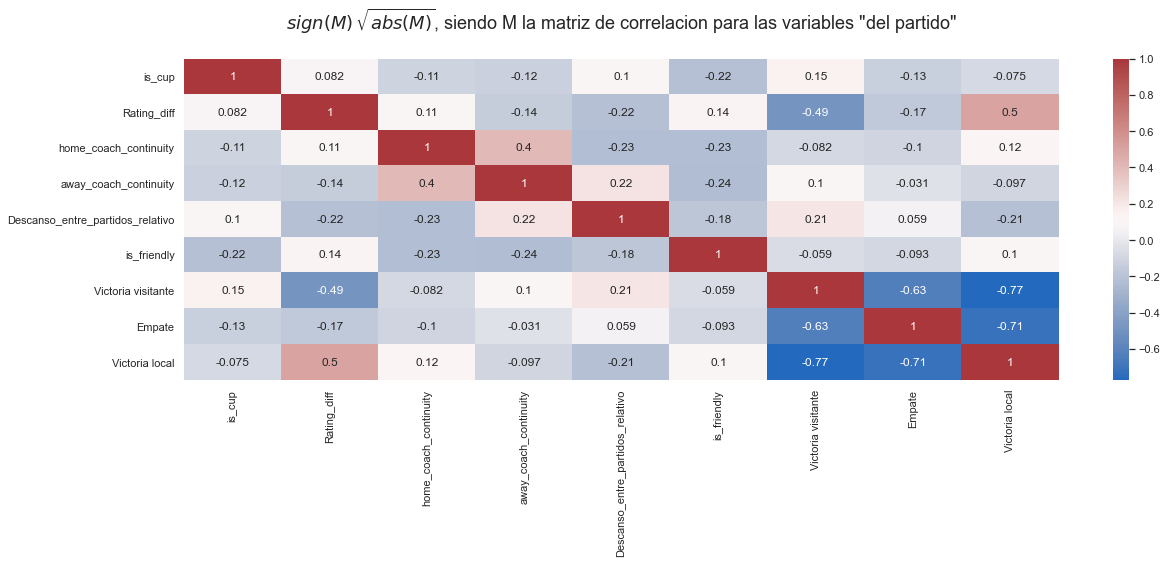

In [26]:
#historic_feature=['goal_diff','rating_diff','coach_continuity','team_history_is_play_home','team_history_is_cup']
tipo='Match_day_Features'
#tipo='Historicas'
fffmp.Matrices_de_correlacion_All_Features(FMP,tipo)

Comentarios:

   * Las correlaciones son en general bastante bajas, siendo el máximo valor (fuera de la diagonal) $0.50$ que corresponde a un valor real de $0.25$.
   * Rating diff: Presenta la mayor correlación (~ $0.25$). Como era de esperarse esa correlación es positiva con respecto a la victoria del equipo con mejor *rating*.
   * El descanso relativo parece tener una correlación opuesta a la esperada, aunque el valor real es ya bastante bajo ($<0.05$).

De aqui para adelante las correlaciones son mínimas. No creo que valga la pena hacer muchos comentarios.

**2) Diferencia de gol en los partidos anteriores**

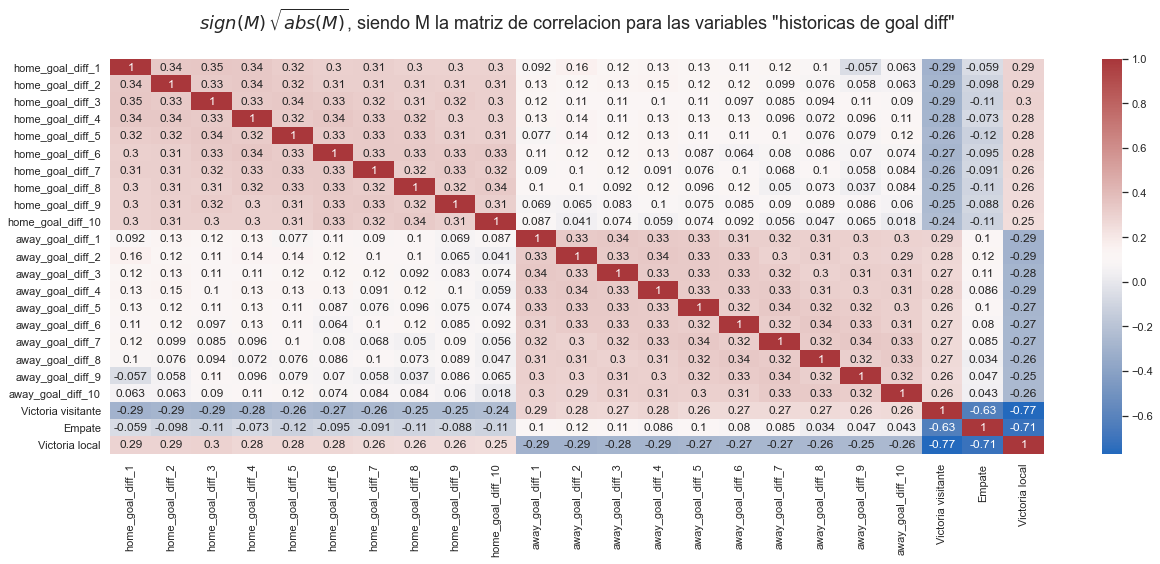

In [27]:
historic_feature=['goal_diff','rating_diff','coach_continuity','team_history_is_play_home','team_history_is_cup']
#tipo='Match_day_Features'
tipo='Historicas'
fffmp.Matrices_de_correlacion_All_Features(FMP,tipo,historic_feature[0])

Aquí el resultado es más claro, y siguiendo lo esperdo. Resultados positivos en partidos anteriores aumentan la probabilidad de una victoria en el partido del día. Como comentario adicional, es notable como encontramos correlaciones de valores parecidos entre las diferencias de gol de los partidos del historial. Mas aún, parecería haber una mayor correlacion dependiendo de la cercanía entre los partidos (i.e. los valores cercanos a la diagonal son ligeramente más grandes).

**3) Diferencia de *rating* en los partidos anteriores**

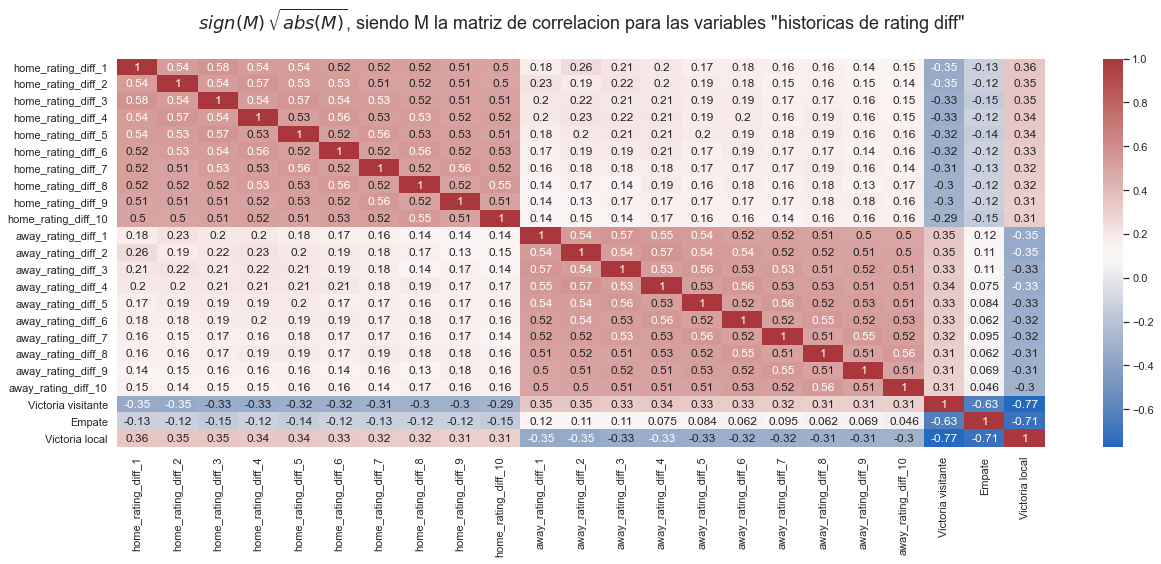

In [28]:
historic_feature=['goal_diff','rating_diff','coach_continuity','team_history_is_play_home','team_history_is_cup']
#tipo='Match_day_Features'
tipo='Historicas'
fffmp.Matrices_de_correlacion_All_Features(FMP,tipo,historic_feature[1])

La situación aqui es similar a lo visto para la diferencia de gol. Diferencias de *rating* altas en partidos anteriores se relacionan con mayores probabilidades de victoria. Como comentario adicional, los *ratings* de los distintos partidos para un mismo equipo estan bastante correlacionados ($0.3$ en valor real)

**4) *Rating* corregido**

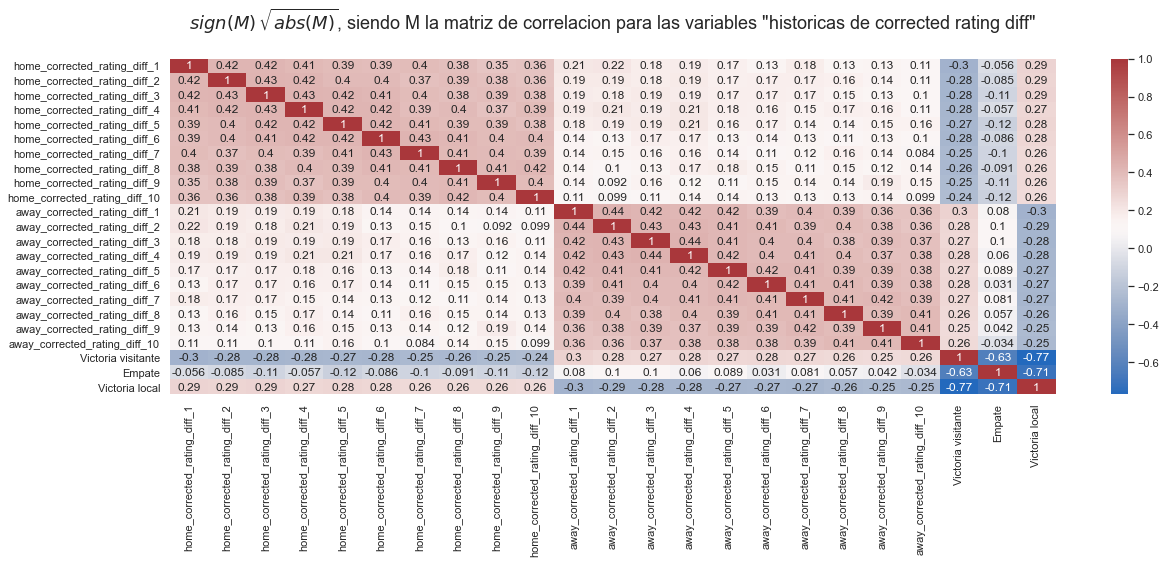

In [29]:
historic_feature=['goal_diff','rating_diff','coach_continuity','team_history_is_play_home','team_history_is_cup','corrected_rating_diff']
#tipo='Match_day_Features'
tipo='Historicas'
fffmp.Matrices_de_correlacion_All_Features(FMP,tipo,historic_feature[5])

Encontramos una correlacion menor con el resultado a modelar. Esto puede deberse a que este valor es más representativo de lo que paso en los partido anteriores, por lo cual parece menos correlacionado que el *rating* original el cual se basa en una evaluacion más global de cada equipo.

**5) Continuidad del Entrenador**

Lo último que miraremos es si la continuidad de un entrenador en los partidos previos tiene algun efecto.

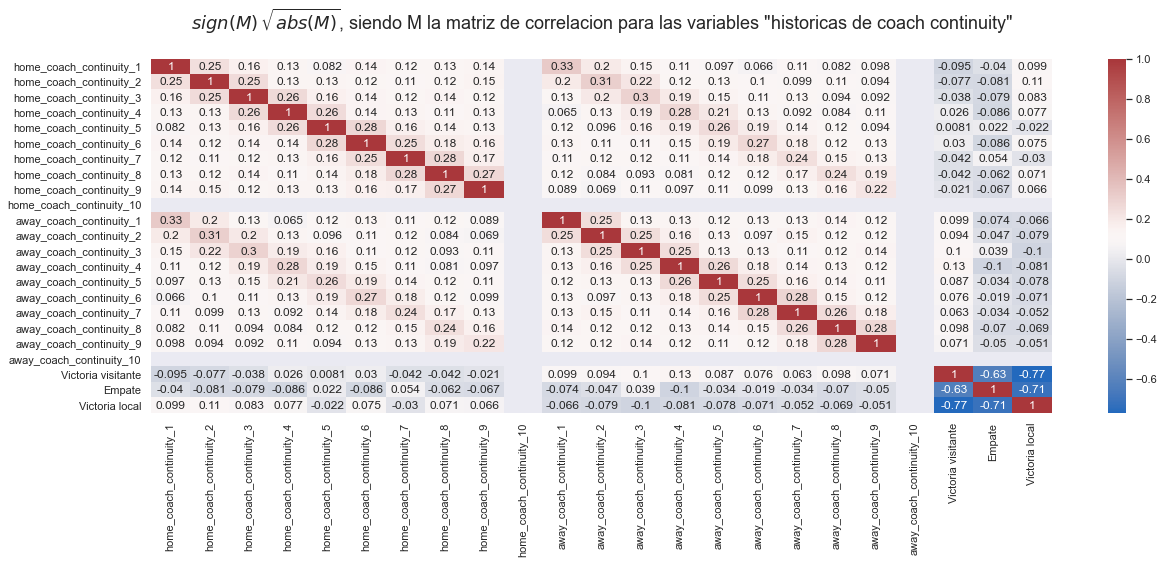

In [30]:
historic_feature=['goal_diff','rating_diff','coach_continuity','team_history_is_play_home','team_history_is_cup']
#tipo='Match_day_Features'
tipo='Historicas'
fffmp.Matrices_de_correlacion_All_Features(FMP,tipo,historic_feature[2])

Aqui no tengo mucho pare decir...